In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import os

c = Census("93c3297165ad8b5b6c81e0ed9e2e44a38e56224f")

In [2]:
baltimore_census = c.acs5.state_county_blockgroup(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.MD.fips,
                                      county_fips = "510",
                                      tract = "*",
                                      blockgroup = "*",
                                      year = 2021)
baltimore_df = pd.DataFrame(baltimore_census)
baltimore_df["GEOID"] = baltimore_df["state"] + baltimore_df["county"] + baltimore_df["tract"] + baltimore_df['block group']

In [3]:
import geopandas as gpd
shapefile_path = '../../raw_data/block_group/tl_2020_24_tabblock20.shp'

baltimore_block = gpd.read_file(shapefile_path)

In [4]:
def extract_block_group(GEOID):
    return GEOID[:12]

baltimore_block = baltimore_block[(baltimore_block['GEOID20'].str[:5] == '24510')]
baltimore_block['GEOID'] = baltimore_block['GEOID20'].apply(extract_block_group)
baltimore_merge = baltimore_block.merge(baltimore_df, on = "GEOID")

In [5]:
baltimore_poverty_tract = baltimore_merge[["GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

In [6]:
baltimore_poverty_tract["Poverty_Rate"] = (baltimore_poverty_tract["C17002_002E"] + baltimore_poverty_tract["C17002_003E"]) / baltimore_poverty_tract["B01003_001E"] * 100

/Users/yangxinyuxie/Desktop/TransitEquity/citylink_data/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Poverty Rates (%) in Baltimore')

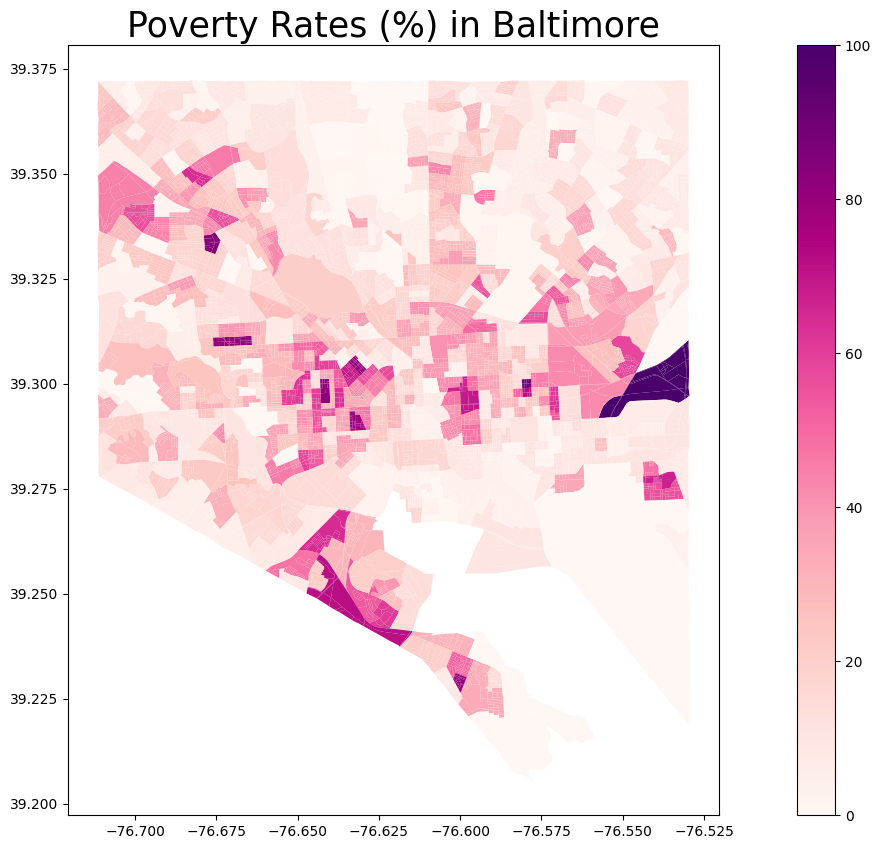

In [7]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
baltimore_poverty_tract.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Baltimore', fontdict = {'fontsize': '25', 'fontweight' : '3'})